In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchinfo import summary
import torch.optim as optim
from torchviz import make_dot

In [4]:
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [5]:
# 2値分類のため、元データから2クラスのデータを抽出
x_data = iris.data[:, [0,2]]
y_data = iris.target[:]

print('抽出データ', x_data.shape, y_data.shape)

抽出データ (150, 2) (150,)


In [7]:
# データを訓練データとテストデータに分割
print(x_data.shape, y_data.shape)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=75, test_size=75, random_state=123)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(150, 2) (150,)
(75, 2) (75,) (75, 2) (75,)


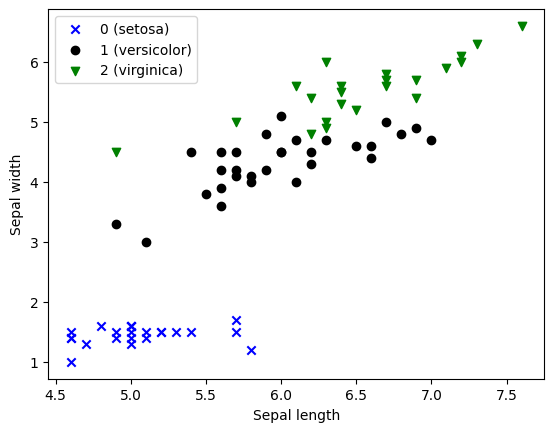

In [8]:
# 散布図の表示
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]
plt.scatter(x_t0[:, 0], x_t0[:, 1], label='0 (setosa)', marker='x', c='b')
plt.scatter(x_t1[:, 0], x_t1[:, 1], label='1 (versicolor)', marker='o', c='k')
plt.scatter(x_t2[:, 0], x_t2[:, 1], label='2 (virginica)', marker='v', c='g')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

In [10]:
n_input = x_train.shape[1]
n_output = len(list(set(y_train)))
print(f'n_input: {n_input}, n_output: {n_output}')


n_input: 2, n_output: 3


In [12]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)
    
    def forward(self, x):
        x1 = self.l1(x)
        return x1

net = Net(n_input, n_output)

In [13]:
for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


In [14]:
criterion = nn.CrossEntropyLoss()

lr = 0.01

optimizer = optim.SGD(net.parameters(), lr=lr)

In [15]:
inputs_train = torch.tensor(x_train).float()
labels_train = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

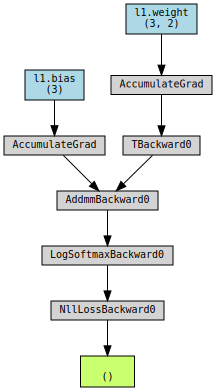

In [16]:
outputs = net(inputs_train)
loss = criterion(outputs, labels_train)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [17]:
torch.max(outputs, 1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

torch.maxのindexesがクラス番号に対応する

In [24]:
lr = 0.01

net = Net(n_input, n_output)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 10000

history = np.zeros((0, 5))

for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = net(inputs_train)

    loss = criterion(outputs, labels_train)

    loss.backward()   # 勾配計算

    optimizer.step()    # パラメータ更新

    predicted = torch.max(outputs, 1)[1]

    train_loss = loss.item()

    train_acc = (predicted == labels_train).sum() / len(y_train)

    with torch.no_grad():
        outputs_test = net(inputs_test)

        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]

        test_loss = loss_test.item()

        test_acc = (predicted_test == labels_test).sum() / len(y_test)

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
        history = np.vstack((history, np.array([epoch, train_loss, train_acc, test_loss, test_acc])))


Epoch [1/10000], Loss: 1.0986, Acc: 0.3067, Test Loss: 1.0926, Test Acc: 0.2667
Epoch [1001/10000], Loss: 0.4546, Acc: 0.8933, Test Loss: 0.4413, Test Acc: 0.9200
Epoch [2001/10000], Loss: 0.3687, Acc: 0.9067, Test Loss: 0.3548, Test Acc: 0.9467
Epoch [3001/10000], Loss: 0.3214, Acc: 0.9067, Test Loss: 0.3071, Test Acc: 0.9467
Epoch [4001/10000], Loss: 0.2905, Acc: 0.9067, Test Loss: 0.2758, Test Acc: 0.9600
Epoch [5001/10000], Loss: 0.2688, Acc: 0.9067, Test Loss: 0.2535, Test Acc: 0.9600
Epoch [6001/10000], Loss: 0.2527, Acc: 0.9067, Test Loss: 0.2369, Test Acc: 0.9600
Epoch [7001/10000], Loss: 0.2403, Acc: 0.9067, Test Loss: 0.2239, Test Acc: 0.9600
Epoch [8001/10000], Loss: 0.2305, Acc: 0.9067, Test Loss: 0.2135, Test Acc: 0.9600
Epoch [9001/10000], Loss: 0.2225, Acc: 0.9067, Test Loss: 0.2050, Test Acc: 0.9600


In [25]:
print(f'初期状態　損失：{history[0, 1]:.4f}, 精度：{history[0, 2]:.4f}')
print(f'最終状態　損失：{history[-1, 1]:.4f}, 精度：{history[-1, 2]:.4f}')

初期状態　損失：1.0986, 精度：0.3067
最終状態　損失：0.2225, 精度：0.9067


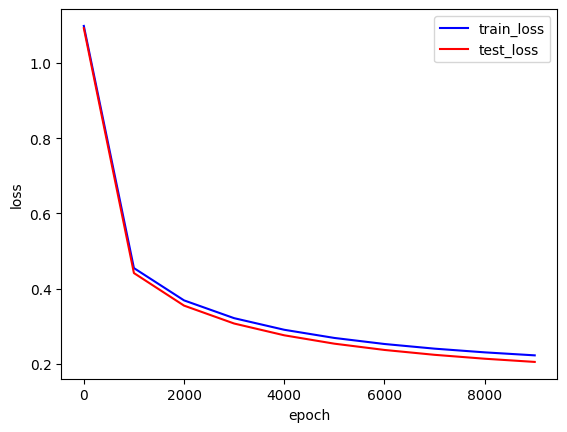

In [27]:
# 学習曲線の表示（損失）
plt.plot(history[:, 0], history[:, 1], label='train_loss', c='b')
plt.plot(history[:, 0], history[:, 3], label='test_loss', c='r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

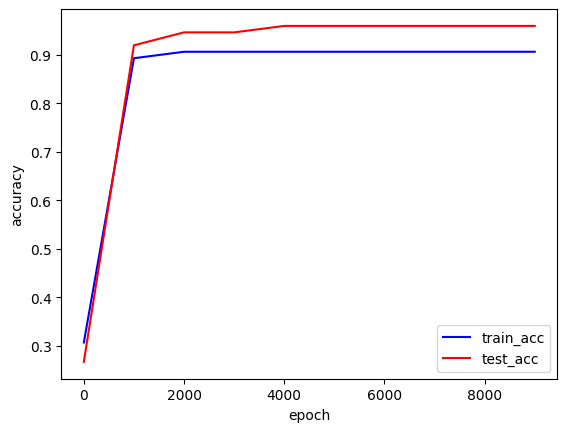

In [28]:
# 学習曲線の表示（精度）
plt.plot(history[:, 0], history[:, 2], label='train_acc', c='b')
plt.plot(history[:, 0], history[:, 4], label='test_acc', c='r')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [31]:
# パラメータの確認
print(net.l1.weight.data)
print(net.l1.bias.data)

tensor([[ 3.0452, -2.5735],
        [ 1.3573,  0.8481],
        [-1.4026,  4.7253]])
tensor([ 1.7178,  1.6563, -0.3741])


(150, 4) (150,)
(75, 4) (75,) (75, 4) (75,)
Epoch [1/10000], Loss: 1.0986, Acc: 0.3067, Test Loss: 1.0916, Test Acc: 0.2667
Epoch [1001/10000], Loss: 0.3711, Acc: 0.9733, Test Loss: 0.3602, Test Acc: 0.9600
Epoch [2001/10000], Loss: 0.2780, Acc: 0.9733, Test Loss: 0.2725, Test Acc: 0.9600
Epoch [3001/10000], Loss: 0.2287, Acc: 0.9867, Test Loss: 0.2271, Test Acc: 0.9600
Epoch [4001/10000], Loss: 0.1980, Acc: 0.9867, Test Loss: 0.1993, Test Acc: 0.9600
Epoch [5001/10000], Loss: 0.1770, Acc: 0.9867, Test Loss: 0.1805, Test Acc: 0.9600
Epoch [6001/10000], Loss: 0.1617, Acc: 0.9867, Test Loss: 0.1670, Test Acc: 0.9600
Epoch [7001/10000], Loss: 0.1500, Acc: 0.9867, Test Loss: 0.1568, Test Acc: 0.9600
Epoch [8001/10000], Loss: 0.1408, Acc: 0.9867, Test Loss: 0.1488, Test Acc: 0.9600
Epoch [9001/10000], Loss: 0.1333, Acc: 0.9867, Test Loss: 0.1424, Test Acc: 0.9600


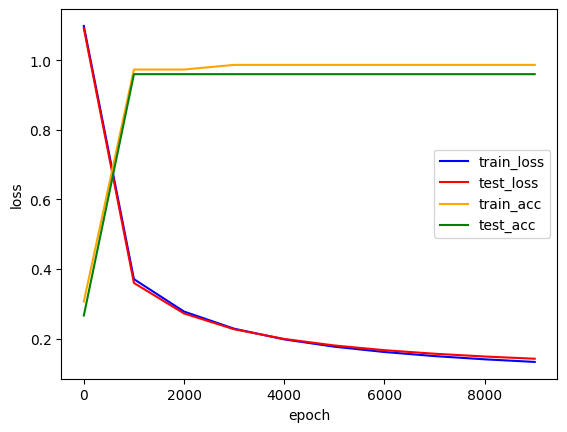

In [37]:
# 入力データの特徴量を増やす
print(x_org.shape, y_org.shape)

x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, train_size=75, test_size=75, random_state=123)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

inputs_train = torch.tensor(x_train).float()
labels_train = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

lr = 0.01

n_input = x_train.shape[1]
n_output = len(list(set(y_train)))

net = Net(n_input, n_output)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 10000

history = np.zeros((0, 5))

for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = net(inputs_train)

    loss = criterion(outputs, labels_train)

    loss.backward()   # 勾配計算

    optimizer.step()    # パラメータ更新

    predicted = torch.max(outputs, 1)[1]

    train_loss = loss.item()

    train_acc = (predicted == labels_train).sum() / len(y_train)

    with torch.no_grad():
        outputs_test = net(inputs_test)

        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]

        test_loss = loss_test.item()

        test_acc = (predicted_test == labels_test).sum() / len(y_test)

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
        history = np.vstack((history, np.array([epoch, train_loss, train_acc, test_loss, test_acc])))

# 学習曲線の表示（損失）
plt.plot(history[:, 0], history[:, 1], label='train_loss', c='b')
plt.plot(history[:, 0], history[:, 3], label='test_loss', c='r')
# 学習曲線の表示（精度）
plt.plot(history[:, 0], history[:, 2], label='train_acc', c='orange')
plt.plot(history[:, 0], history[:, 4], label='test_acc', c='g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

入力する特徴量を増やした結果，精度は変化しなかったものの損失が減少した

In [ ]:
分類は英語で